<a href="https://www.kaggle.com/code/karishmabattina/rainfall-cat?scriptVersionId=227097103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")

In [3]:
train_data.shape

(2190, 13)

In [4]:
test_data.shape

(730, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [6]:
train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [7]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [8]:
train_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [9]:
test_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [10]:
test_data['winddirection'].fillna(test_data['winddirection'].median(), inplace=True)

<ipython-input-10-821c4f34ce7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['winddirection'].fillna(test_data['winddirection'].median(), inplace=True)


In [11]:
test_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [12]:
numerical_variables = ['winddirection', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']
target_variable = 'rainfall' 
categorical_variables = []

array([[<Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>],
       [<Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>],
       [<Axes: title={'center': 'windspeed'}>, <Axes: >, <Axes: >]],
      dtype=object)

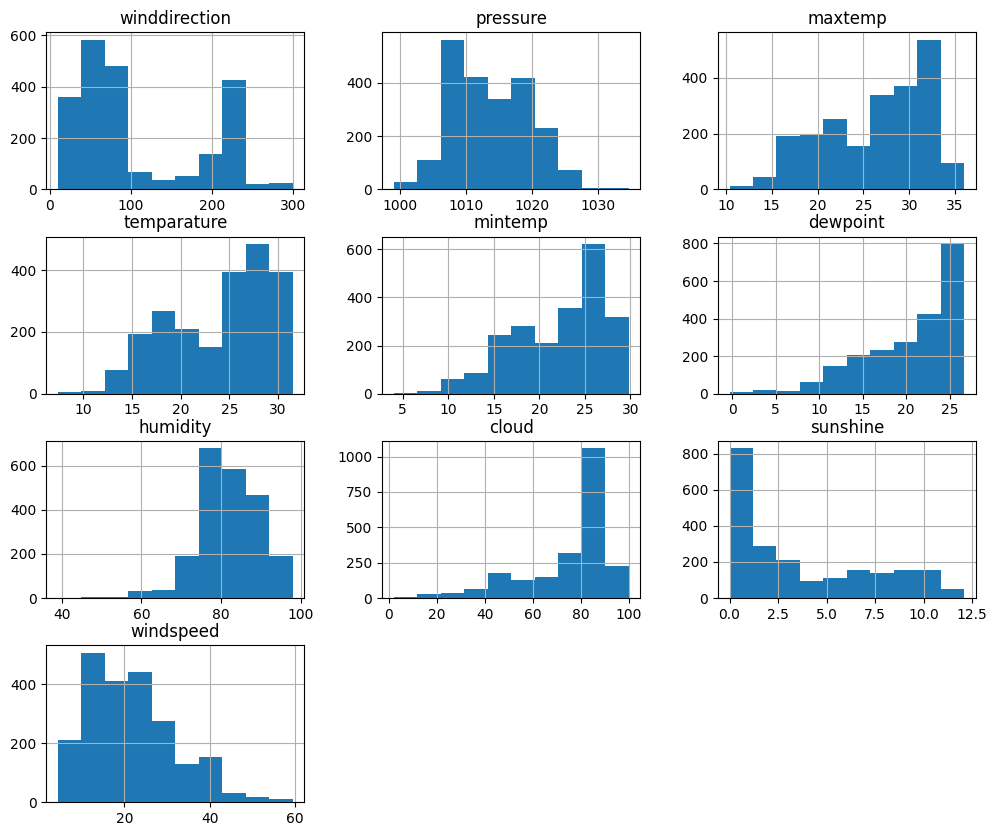

In [13]:
train_data[numerical_variables].hist(figsize=(12, 10))

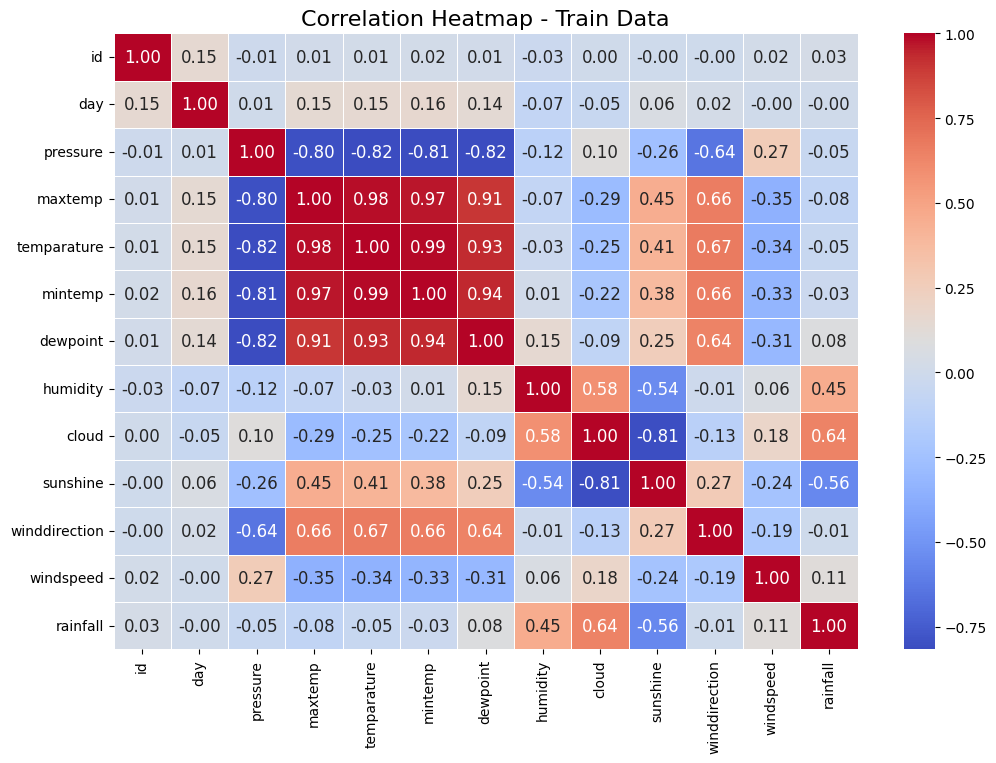

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
def plot_correlation_heatmap(data, title, annot_size=12):
    plt.figure(figsize=(12, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, annot_kws={"size": annot_size},cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap - {title}', fontsize=16)
    plt.show()

plot_correlation_heatmap(train_data, "Train Data")

<Axes: xlabel='rainfall', ylabel='count'>

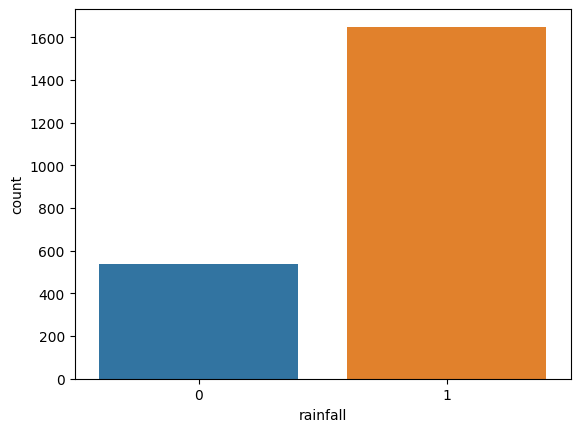

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rainfall', data=train_data)

<Axes: xlabel='cloud', ylabel='temparature'>

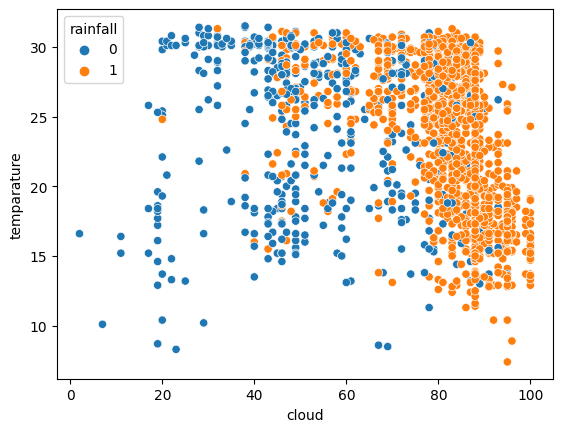

In [16]:
sns.scatterplot(x=train_data['cloud'], y=train_data['temparature'], hue=train_data['rainfall'])

<Axes: xlabel='sunshine', ylabel='temparature'>

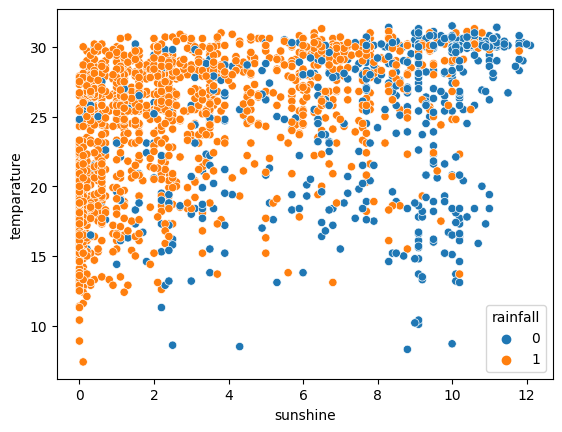

In [17]:
sns.scatterplot(x=train_data['sunshine'], y=train_data['temparature'], hue=train_data['rainfall'])

<Axes: xlabel='pressure', ylabel='temparature'>

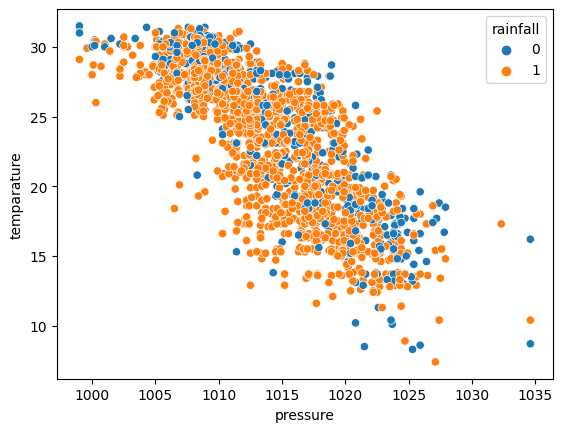

In [18]:
sns.scatterplot(x=train_data['pressure'], y=train_data['temparature'], hue=train_data['rainfall'])

<Axes: xlabel='humidity', ylabel='temparature'>

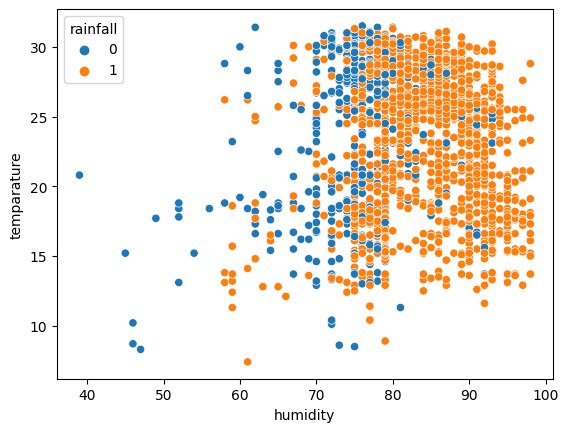

In [19]:
sns.scatterplot(x=train_data['humidity'], y=train_data['temparature'], hue=train_data['rainfall'])

In [20]:
def engineer_features(df):
    df['winddirection_sin'] = np.sin(2 * np.pi * df['winddirection'] / 360)
    df['winddirection_cos'] = np.cos(2 * np.pi * df['winddirection'] / 360)
    df['dew_depression'] = df['temparature'] - df['dewpoint']
    df.drop('winddirection', axis=1, inplace=True)
    return df

In [21]:
train_data = engineer_features(train_data)
test_data = engineer_features(test_data)

In [22]:
from sklearn.model_selection import train_test_split

# Split data
X = train_data.drop('rainfall', axis=1)
y = train_data['rainfall']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [23]:
from catboost import CatBoostClassifier

# Model training
model = CatBoostClassifier(learning_rate=0.03,
                           depth=8,
                           bagging_temperature=1.0,
                           random_strength=2.6,
                           n_estimators=2000,
                           l2_leaf_reg=7,
                           border_count=128,
                           early_stopping_rounds=100,
                           loss_function='Logloss',
                           eval_metric='AUC',
                           use_best_model=True,
                           random_state=42)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50)

0:	test: 0.8483481	best: 0.8483481 (0)	total: 57.4ms	remaining: 1m 54s
1:	test: 0.8689896	best: 0.8689896 (1)	total: 61.3ms	remaining: 1m 1s
2:	test: 0.8804080	best: 0.8804080 (2)	total: 64.3ms	remaining: 42.8s
3:	test: 0.8804482	best: 0.8804482 (3)	total: 67ms	remaining: 33.5s
4:	test: 0.8819340	best: 0.8819340 (4)	total: 70.1ms	remaining: 28s
5:	test: 0.8860971	best: 0.8860971 (5)	total: 73.3ms	remaining: 24.3s
6:	test: 0.8873420	best: 0.8873420 (6)	total: 76.2ms	remaining: 21.7s
7:	test: 0.8839420	best: 0.8873420 (6)	total: 78.7ms	remaining: 19.6s
8:	test: 0.8850129	best: 0.8873420 (6)	total: 81.1ms	remaining: 17.9s
9:	test: 0.8847451	best: 0.8873420 (6)	total: 83.5ms	remaining: 16.6s
10:	test: 0.8844239	best: 0.8873420 (6)	total: 85.9ms	remaining: 15.5s
11:	test: 0.8852538	best: 0.8873420 (6)	total: 88.3ms	remaining: 14.6s
12:	test: 0.8868066	best: 0.8873420 (6)	total: 90.7ms	remaining: 13.9s
13:	test: 0.8836475	best: 0.8873420 (6)	total: 93.1ms	remaining: 13.2s
14:	test: 0.8825766

In [24]:
preds = model.predict(test_data)

In [25]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'rainfall': preds
})
submission.to_csv('submission.csv', index=False)